In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import random
import pandas as pd
def get_puff(puff_length_seconds=3,fs=20):
    t = torch.linspace(0,(puff_length_seconds*fs)-1,puff_length_seconds*fs)
    puff = torch.zeros(puff_length_seconds*fs)-9.81
    edge = -2*t+9.81
    puff[:10] = edge[:10]
    puff[-10:] = edge[:10].flip(0)
    return puff

In [ ]:
fs = 20
length_seconds = 60*60
n_samples = length_seconds*fs
t = torch.linspace(0,n_samples-1,n_samples)
X = torch.zeros_like(t)+9.81
y = torch.zeros_like(t)
puff_idx = random.sample(list(t.long().numpy()),10)
puff = get_puff()
for idx in puff_idx:
    X[idx:idx+len(puff)] = puff
    y[idx:idx+len(puff)] = 1
X = X.unsqueeze(1)
y = y.unsqueeze(1)
# df = pd.DataFrame([X,y]).T
# import plotly.express as px
# fig = px.line(df)
# fig.show(renderer='browser')

In [ ]:
from torch.utils.data import DataLoader,TensorDataset
from torch import nn
from torch.nn.functional import relu

trainloader = DataLoader(TensorDataset(X,y),batch_size=32,shuffle=True)
class MODEL(nn.Module):
    """
    Musa initial epoch9 model for poster
    """
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3,1)
    
    def forward(self, x):
        x = self.fc1(x)
        return x  
device = 'cuda'
model = MODEL().to(device=device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())
params = sum([p.flatten().size()[0] for p in list(model.parameters())])
print("Params: ",params)
from tqdm import tqdm
lossi = []
model.train()

for i in range(1):
    for (X_tr,y_tr) in tqdm(trainloader):
        X_tr,y_tr = X_tr.to(device),y_tr.to(device)
        logits = model(X_tr)
        loss = criterion(logits,y_tr)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        lossi.append(loss.item())
plt.plot(lossi)
print(torch.tensor(lossi).mean())

In [ ]:
from tqdm import tqdm
lossi = []
model.train()

for i in range(1):
    for (X_tr,y_tr) in tqdm(trainloader):
        X_tr,y_tr = X_tr.to(device),y_tr.to(device)
        logits = model(X_tr)
        loss = criterion(logits,y_tr)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        lossi.append(loss.item())
plt.plot(lossi)
print(torch.tensor(lossi).mean())

In [ ]:
plt.plot(model(X.cuda()).detach().cpu())
plt.plot(X)

100%|██████████| 4469/4469 [00:01<00:00, 2870.89it/s]


(0.10298160512607173,
 tensor([[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]),
 tensor([[2.1683e-02],
         [1.6680e-04],
         [1.0439e-02],
         ...,
         [2.6555e-01],
         [5.4792e-03],
         [1.9545e-02]]))

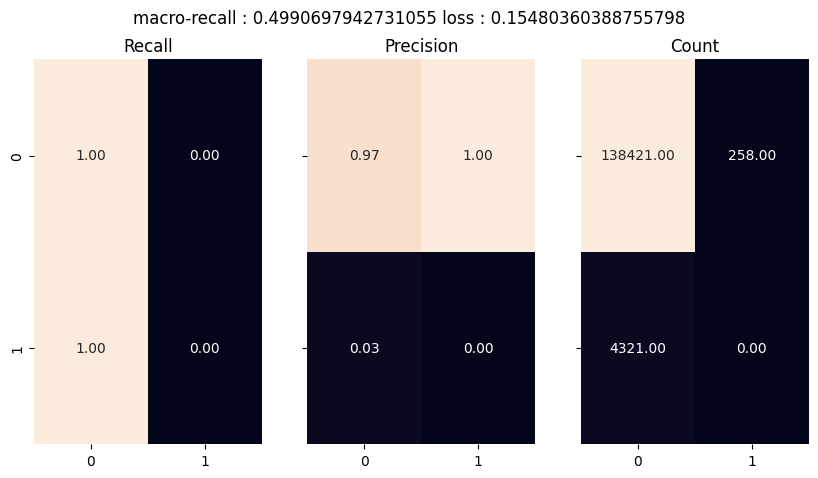

In [325]:
from lib.utils import test_evaluation
test_evaluation(trainloader,model,criterion)